In [137]:
!pip3 install --upgrade numpy


[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: pip3 install --upgrade pip


In [138]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import joblib

### Limpieza

In [139]:
# Cargar el archivo CSV
file_path = "/Users/kathelopez/Desktop/5_Entregable_Grupal/Modelo/data_3/country_find_final.csv"
df = pd.read_csv(file_path)

# Renombrar columnas 
df_columns = df.rename(columns={
    "Country Name": "pais",
    "Region": "region",
    "Continent": "continente",
    "Desempleo hombres": "desempleo_hombres",
    "Pago de impuestos (numero)": "pago_impuestos",
    "Desempleo mujeres": "desempleo_mujeres",
    "Desempleo, total": "desempleo_total",
    "Empleos agricultura": "empleos_agricultura",
    "Indice facilidad para hacer negocios": "indice_facilidad_para_hacer_negocios",
    "Crecimiento PIB per capita": "crecimiento_PIB_per_capita",
    "Contaminación aire": "contaminacion_aire",
    "Agricultura, silvicultura y pesca, valor agregado": "agricultura_silvicultura_pesca_valor_agregado",
    "Exportaciones bienes y servicios (% del PIB)": "exportaciones_bienes_servicios_PIB",
    "Nuevas empresas registradas (numero)": "nuevas_empresas_registradas",
    "Empleadores, total": "empleadores_total",
    "Inflación, deflactor del PIB (%) anual": "inflacion_deflactor_PIB",
    "Personas desempleadas educación basica": "personas_desempleadas_educacion_basica",
    "Tierras cultivables": "tierras_cultivables",
    "Trabajadores asalariados (empleados), total": "trabajadores_asalariados",
    "Medicos (cada 1.000 personas)": "medicos_por_1000_personas",
    "Inversión extranjera directa": "inversion_extranjera_directa",
    "Crecimiento población urbana": "crecimiento_poblacion_urbana",
    "Empleo vulnerable, total": "empleo_vulnerable_total",
    "Personas desempleadas educación avanzada": "personas_desempleadas_educacion_avanzada",
    "PIB per capita US a precios actuales": "PIB_per_capita",
    "Comercio servicios": "comercio_servicios",
    "Empleados agricultura - hombres": "empleados_agricultura_hombres",
    "Exportaciones de bienes y servicios(% anual)": "exportaciones_bienes_servicios",
    "Personas desempleadas educación intermedia": "personas_desempleadas_educacion_intermedia",
    "Empleados agricultura - mujeres": "empleados_agricultura_mujeres",
    "Score": "puntaje",
    "Perceptions of corruption": "corrupcion",
    "Health": "salud",
    "Freedom": "libertad",
    "Agricultura, silvicultura y pesca": "agricultura_silvicultura_pesca",
    "Industria (incluye Manufactura)": "industria",
    "Construcción": "construccion",
    "Comercio al por mayor y al por menor, transporte, alojamiento y servicios de comida": "comercio_por_mayor_menor_transporte_alojamiento_comida",
    "Información y comunicación": "informacion_comunicacion",
    "Actividades financieras y de seguros": "actividades_financieras_seguros",
    "Actividades inmobiliarias": "actividades_inmobiliarias",
    "Actividades profesionales, científicas y técnicas; actividades administrativas y de apoyo": "actividades_profesionales_cientificas_tecnicas_administrativas_apoyo",
    "Administración pública, defensa, educación, actividades de salud humana y de trabajo social": "administracion_publica_defensa_educacion_salud_trabajo_social",
    "Artes, entretenimiento y recreación; otras actividades de servicios; actividades de organizaciones y cuerpos extraterritoriales": "artes_entretenimiento_recreacion_servicios_organizaciones_extraterritoriales"
})

# Lista de columnas a eliminar
columns_to_remove = [
    'region', 'desempleo_hombres', 'pago_impuestos', 'desempleo_mujeres', 'empleos_agricultura', 'agricultura_silvicultura_pesca_valor_agregado',
    'exportaciones_bienes_servicios_PIB', 'nuevas_empresas_registradas', 'empleadores_total', 'personas_desempleadas_educacion_basica', 'tierras_cultivables',
    'trabajadores_asalariados', 'empleo_vulnerable_total', 'personas_desempleadas_educacion_avanzada', 'empleados_agricultura_hombres', 'exportaciones_bienes_servicios',
    'personas_desempleadas_educacion_intermedia', 'empleados_agricultura_mujeres', 'puntaje', 'salud', 'agricultura_silvicultura_pesca', 'industria', 'construccion',
    'comercio_por_mayor_menor_transporte_alojamiento_comida', 'informacion_comunicacion', 'actividades_financieras_seguros', 'actividades_inmobiliarias',
    'actividades_profesionales_cientificas_tecnicas_administrativas_apoyo', 'administracion_publica_defensa_educacion_salud_trabajo_social',
    'artes_entretenimiento_recreacion_servicios_organizaciones_extraterritoriales'
]
columns_to_remove = [col for col in columns_to_remove if col in df_columns.columns]  # Filtrar columnas existentes
df_cleaned = df_columns.drop(columns=columns_to_remove)

# Normalizar los datos excepto 'pais' y 'continente'
scaler = StandardScaler()
numeric_columns = df_cleaned.select_dtypes(include=[np.number]).columns
df_cleaned[numeric_columns] = scaler.fit_transform(df_cleaned[numeric_columns])

df_cleaned.to_csv('/Users/kathelopez/Desktop/5_Entregable_Grupal/Modelo/data_3/country_find_cleaned.csv', index=False)

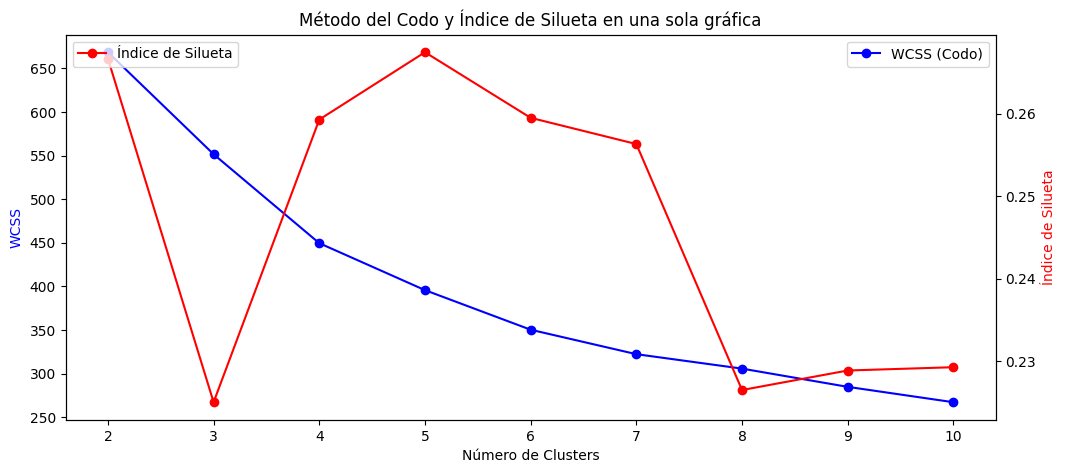


Comparación de Índice de Silueta para diferentes números de clusters:
   Número de Clusters  Índice de Silueta     Comentario
0                   3           0.225029  Menor calidad
1                   4           0.259282  Menor calidad
2                   5           0.267444   Mejor opción
3                   6           0.259494  Menor calidad

Índice de Silueta para K-Means con 5 clusters: 0.26744385408842725


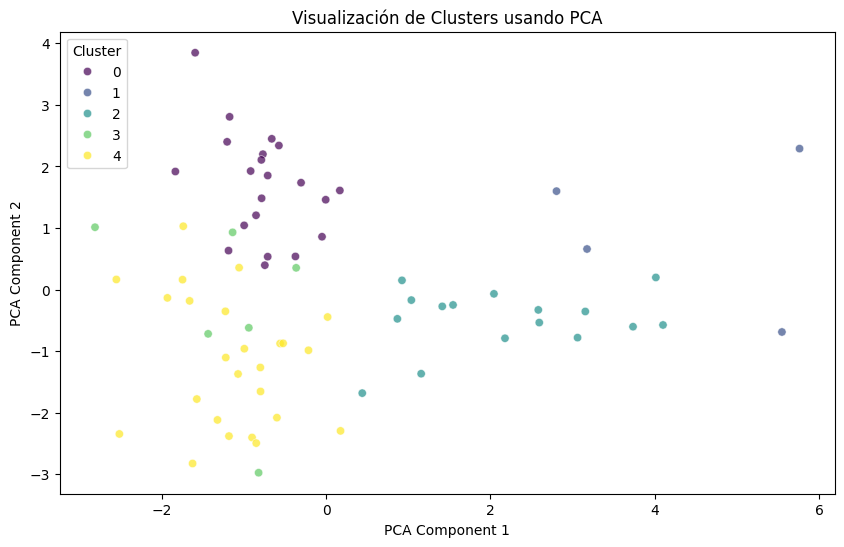

/var/folders/bd/c6514xtd1zjgq83rf48wyhn00000gn/T/ipykernel_67231/3174850482.py:94: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=importance_df["Variable"], x=importance_df["Importancia"], palette="viridis")


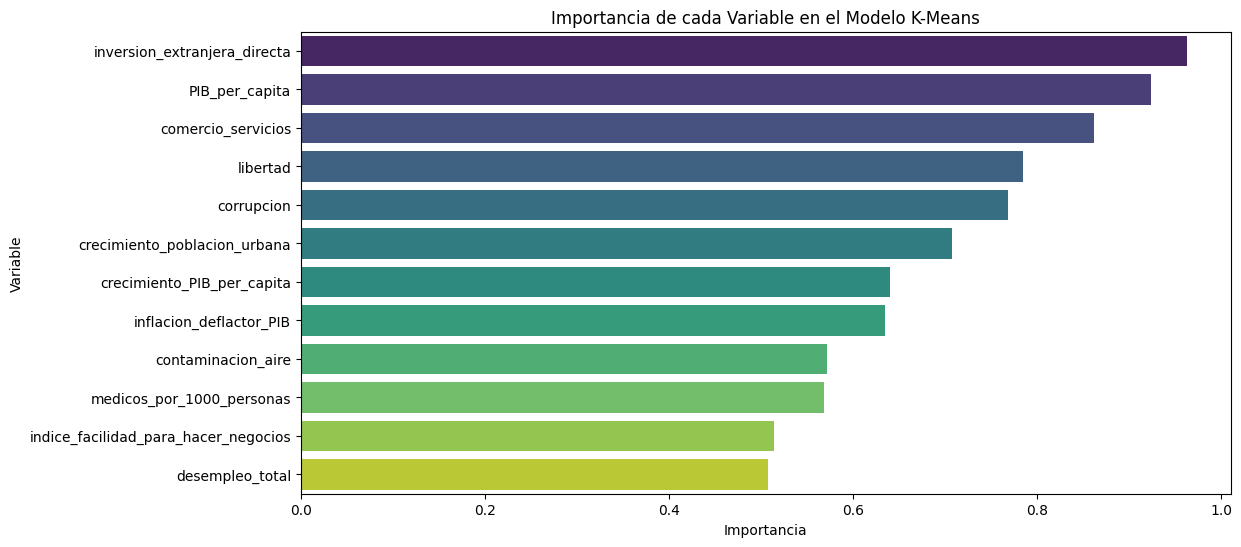

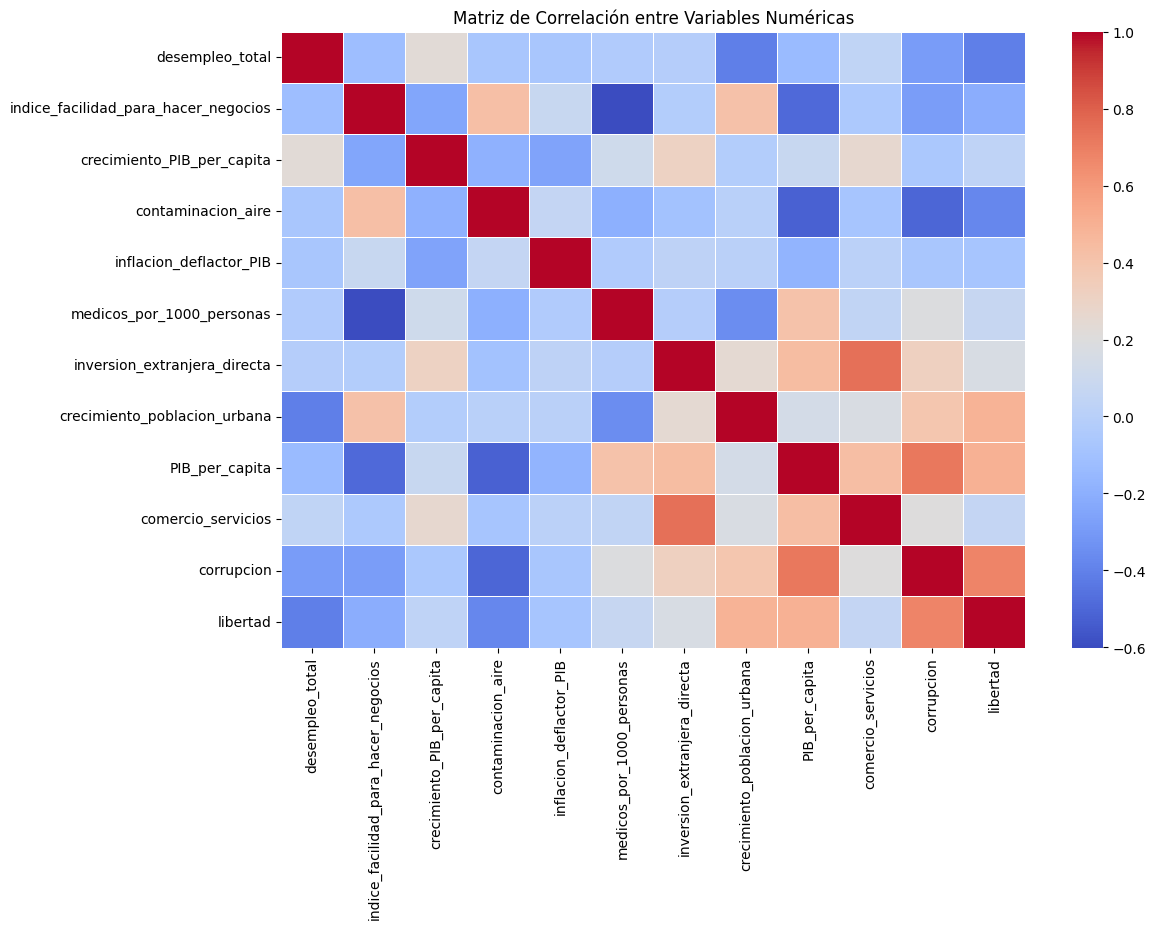


Características principales de cada clúster:

Clúster 0:
indice_facilidad_para_hacer_negocios    0.946261
crecimiento_poblacion_urbana            0.933348
contaminacion_aire                      0.463882
libertad                                0.390995
corrupcion                             -0.088737
Name: 0, dtype: float64

Clúster 1:
inversion_extranjera_directa    3.745995
comercio_servicios              3.236092
PIB_per_capita                  1.798572
crecimiento_PIB_per_capita      1.328798
corrupcion                      1.272431
Name: 1, dtype: float64

Clúster 2:
corrupcion                      1.191727
PIB_per_capita                  1.183250
libertad                        0.944449
medicos_por_1000_personas       0.696277
crecimiento_poblacion_urbana    0.047250
Name: 2, dtype: float64

Clúster 3:
inflacion_deflactor_PIB                 2.276178
medicos_por_1000_personas               0.869731
contaminacion_aire                      0.475942
indice_facilidad_para_hacer_nego

In [140]:
# 1. Cargar el dataset
file_path = "/Users/kathelopez/Desktop/5_Entregable_Grupal/Modelo/data_3/country_find_cleaned.csv"  
df = pd.read_csv(file_path)

# 2. Seleccionar solo las columnas numéricas para clustering
numeric_columns = df.select_dtypes(include=[np.number]).columns.tolist()
df_numeric = df[numeric_columns]

# 3. Normalizar los datos para evitar sesgo en las escalas de las variables
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numeric)

# 4. Determinar el número óptimo de clusters usando el método del codo y el índice de silueta
wcss = []  # Within-cluster sum of squares
silhouette_scores = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(df_scaled, kmeans.labels_))

# 5. Graficar el método del codo y el índice de silueta en una sola figura
fig, ax1 = plt.subplots(figsize=(12, 5))
ax2 = ax1.twinx()

ax1.plot(k_range, wcss, 'bo-', label="WCSS (Codo)")
ax2.plot(k_range, silhouette_scores, 'ro-', label="Índice de Silueta")

ax1.set_xlabel('Número de Clusters')
ax1.set_ylabel('WCSS', color='blue')
ax2.set_ylabel('Índice de Silueta', color='red')
ax1.set_title('Método del Codo y Índice de Silueta en una sola gráfica')

ax1.legend(loc="upper right")
ax2.legend(loc="upper left")

plt.show()

# 6. Comparación del índice de silueta para diferentes valores de clusters (3, 4, 5 y 6)
cluster_options = [3, 4, 5, 6]
silhouette_results = {}

for k in cluster_options:
    kmeans_test = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans_test.fit_predict(df_scaled)
    silhouette_results[k] = silhouette_score(df_scaled, labels)

# Convertir los resultados en un DataFrame
silhouette_df = pd.DataFrame(list(silhouette_results.items()), columns=["Número de Clusters", "Índice de Silueta"])

# Agregar comentario sobre la mejor opción
silhouette_df["Comentario"] = silhouette_df["Índice de Silueta"].apply(
    lambda x: "Mejor opción" if x == max(silhouette_df["Índice de Silueta"]) else "Menor calidad")

# Mostrar la tabla con los resultados
print("\nComparación de Índice de Silueta para diferentes números de clusters:")
print(silhouette_df)

# 7. Aplicar K-Means con el número óptimo de clusters (5 según los análisis previos)
optimal_k = 5
kmeans_final = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df["Cluster"] = kmeans_final.fit_predict(df_scaled)

# 8. Calcular el índice de silueta para evaluar la calidad del clustering
silhouette_avg = silhouette_score(df_scaled, df["Cluster"])
print(f"\nÍndice de Silueta para K-Means con {optimal_k} clusters: {silhouette_avg}")

# 9. Reducir la dimensionalidad con PCA para visualizar los clusters
pca = PCA(n_components=2, random_state=42)
df_pca = pca.fit_transform(df_scaled)

# Agregar los valores de PCA al dataframe
df["PCA1"] = df_pca[:, 0]
df["PCA2"] = df_pca[:, 1]

# 10. Graficar los clusters en un scatter plot con PCA
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df["PCA1"], y=df["PCA2"], hue=df["Cluster"], palette="viridis", alpha=0.7)
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("Visualización de Clusters usando PCA")
plt.legend(title="Cluster")
plt.show()

# 11. Calcular la importancia de cada variable en el modelo K-Means
feature_importance = np.abs(kmeans_final.cluster_centers_).mean(axis=0)
importance_df = pd.DataFrame({"Variable": numeric_columns, "Importancia": feature_importance})
importance_df = importance_df.sort_values(by="Importancia", ascending=False)

# 12. Graficar la importancia de las variables
plt.figure(figsize=(12, 6))
sns.barplot(y=importance_df["Variable"], x=importance_df["Importancia"], palette="viridis")
plt.xlabel("Importancia")
plt.ylabel("Variable")
plt.title("Importancia de cada Variable en el Modelo K-Means")
plt.show()

# 13. Graficar la matriz de correlación
plt.figure(figsize=(12, 8))
sns.heatmap(df_numeric.corr(), cmap="coolwarm", annot=False, fmt=".2f", linewidths=0.5)
plt.title("Matriz de Correlación entre Variables Numéricas")
plt.show()


# 11. Calcular la media de cada variable en cada clúster
cluster_analysis = df.groupby("Cluster")[numeric_columns].mean()

# 12. Interpretación de los clústeres
cluster_descriptions = {}
for cluster in range(optimal_k):
    description = cluster_analysis.loc[cluster].sort_values(ascending=False).head(5)
    cluster_descriptions[cluster] = description

# Mostrar la descripción de cada clúster
print("\nCaracterísticas principales de cada clúster:")
for cluster, description in cluster_descriptions.items():
    print(f"\nClúster {cluster}:")
    print(description)

# 14. Mostrar la asignación de países a clústeres
df_countries_clusters = df[["pais", "continente", "Cluster"]].sort_values("Cluster")
print("\nAsignación de Países a Clústeres:")
print(df_countries_clusters)

# 15. Guardar resultados en archivos CSV
df_countries_clusters.to_csv("/Users/kathelopez/Desktop/5_Entregable_Grupal/Modelo/data_3/asignacion_paises_cluster.csv", index=False)
cluster_analysis.to_csv("/Users/kathelopez/Desktop/5_Entregable_Grupal/Modelo/data_3/analisis_clusters.csv")

print("\nResultados guardados en:")
print("- /Users/kathelopez/Desktop/5_Entregable_Grupal/Modelo/data_3/asignacion_paises_cluster.csv (Países y sus Clústeres)")
print("- /Users/kathelopez/Desktop/5_Entregable_Grupal/Modelo/data_3/analisis_clusters.csv (Análisis de Clústeres)")

## Análisis de los clústeres:

##### Descripción de cada clúster basado en los promedios de las variables:

#### Clúster 0: Economías en crecimiento con desafíos ambientales y desigualdad
- Alta facilidad para hacer negocios (+0.94).
- Alta contaminación del aire (+0.46).
- Alto crecimiento de la población urbana (+0.93).
- Nivel moderado de corrupción (-0.08) y libertad económica moderada (+0.39).
- Desempleo relativamente bajo (-0.51).

Posible interpretación: Países con economías en crecimiento, con urbanización rápida y facilidad para hacer negocios, pero con problemas ambientales y desigualdad.

#### Clúster 1: Economías desarrolladas con fuerte comercio y baja contaminación
- Muy alta inversión extranjera directa (+3.74).
- Muy alto comercio de servicios (+3.23).
- Alto PIB per cápita (+1.79).
- Baja contaminación del aire (-0.36).
- Alta libertad económica (+1.00) y baja corrupción (+1.27).

Posible interpretación: Países con economías muy desarrolladas, gran apertura comercial y estabilidad económica, con buenas condiciones ambientales.

#### Clúster 2: Países con altos ingresos y estabilidad institucional
- Alto PIB per cápita (+1.18).
- Baja corrupción (+1.19).
- Alta libertad económica (+0.94).
- Moderada facilidad para hacer negocios (-0.91).
- Baja contaminación del aire (-1.22).

Posible interpretación: Economías sólidas y estables con altos ingresos, pero con cierta dificultad para hacer negocios o barreras burocráticas.

#### Clúster 3: Economías con crisis y alta inflación
- Muy alta inflación (+2.27).
- Bajo crecimiento del PIB per cápita (-1.07).
- Alta contaminación del aire (+0.47).
- Baja libertad económica (-0.64).
- Alta disponibilidad de médicos (+0.86).

Posible interpretación: Países en crisis económica con alta inflación y bajo crecimiento, pero con infraestructura médica estable.

#### Clúster 4: Países en transición con baja inversión y corrupción moderada
- Desempleo alto (+0.82).
- Baja inversión extranjera (-0.12).
- Baja corrupción (-0.76).
- Baja libertad económica (-0.93).
- Crecimiento moderado del PIB (+0.36).

Posible interpretación: Países con economías en transición o estancamiento, con problemas en la inversión extranjera y empleo, pero con relativa estabilidad institucional.

##### Conclusión
-Clúster 1 y Clúster 2 representan economías estables y prósperas, pero con enfoques distintos (clúster 1 es más comercial y globalizado, clúster 2 más institucionalmente fuerte).
- Clúster 3 muestra países en crisis con inflación elevada.
- Clúster 0 representa países con economías en crecimiento, pero con problemas ambientales y desigualdad.
- Clúster 4 está formado por países con economías en transición, bajo empleo y menor confianza en el mercado.
￼

In [141]:
# Guardar el modelo K-Means entrenado
model_filename = "/Users/kathelopez/Desktop/5_Entregable_Grupal/Modelo/data_3/kmeans_model_country.pkl"
joblib.dump(kmeans_final, model_filename)

# Guardar el escalador para futuras predicciones
scaler_filename = "/Users/kathelopez/Desktop/5_Entregable_Grupal/Modelo/data_3/scaler_country.pkl"
joblib.dump(scaler, scaler_filename)

# Guardar el DataFrame con los clusters asignados
output_filename = "/Users/kathelopez/Desktop/5_Entregable_Grupal/Modelo/data_3/country_clusters.csv"
df.to_csv(output_filename, index=False)

# Devolver los enlaces de los archivos guardados
model_filename, scaler_filename, output_filename

('/Users/kathelopez/Desktop/5_Entregable_Grupal/Modelo/data_3/kmeans_model_country.pkl',
 '/Users/kathelopez/Desktop/5_Entregable_Grupal/Modelo/data_3/scaler_country.pkl',
 '/Users/kathelopez/Desktop/5_Entregable_Grupal/Modelo/data_3/country_clusters.csv')

In [143]:
with open("/Users/kathelopez/Desktop/5_Entregable_Grupal/Modelo/data_3/kmeans_model_country.pkl", "rb") as file:
    content = file.read()
print(content[:100])  # Muestra los primeros 100 bytes del archivo

b'\x80\x04\x95\x0f\x02\x00\x00\x00\x00\x00\x00\x8c\x17sklearn.cluster._kmeans\x94\x8c\x06KMeans\x94\x93\x94)\x81\x94}\x94(\x8c\nn_clusters\x94K\x05\x8c\x04init\x94\x8c\tk-means++\x94\x8c\x08max_iter\x94M'


In [145]:
import joblib

try:
    # Cargar el modelo con joblib
    kmeans = joblib.load("/Users/kathelopez/Desktop/5_Entregable_Grupal/Modelo/data_3/kmeans_model_country.pkl")
    print("✅ Modelo cargado correctamente con joblib.")
except FileNotFoundError:
    print("❌ Error: No se encontró el archivo del modelo.")
except Exception as e:
    print(f"❌ Otro error ocurrió al cargar el modelo: {e}")

✅ Modelo cargado correctamente con joblib.


## Prueba

In [146]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# 1. Cargar el modelo entrenado y los datos
model_path = "/Users/kathelopez/Desktop/5_Entregable_Grupal/Modelo/data_3/kmeans_model_country.pkl"  # Reemplázalo con la ruta correcta de tu modelo entrenado
clusters_path = "/Users/kathelopez/Desktop/5_Entregable_Grupal/Modelo/data_3/analisis_clusters.csv"  # Archivo con los análisis de los clústeres
data_path = "/Users/kathelopez/Desktop/5_Entregable_Grupal/Modelo/data_3/country_find_cleaned.csv"  # Archivo con los datos originales de los países

# Cargar modelo K-Means entrenado
with open(model_path, "rb") as file:
    kmeans = joblib.load(file)

# Cargar el dataset con los países y su información
df = pd.read_csv(data_path)

# Cargar análisis de clústeres
df_clusters = pd.read_csv(clusters_path)

# 2. Seleccionar solo las columnas numéricas para clustering
numeric_columns = df.select_dtypes(include=[np.number]).columns.tolist()
df_numeric = df[numeric_columns]

# Normalizar los datos para que coincidan con el modelo entrenado
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numeric)

# Asignar los clústeres a cada país con el modelo K-Means cargado
df["Cluster"] = kmeans.predict(df_scaled)

# 3. Definir preguntas y variables asociadas
question_variable_mapping = {
    "¿Qué tan importante es para ti que los salarios en el país sean altos?": "PIB_per_capita",
    "¿Qué tan importante es que sea fácil abrir un negocio o encontrar empleo?": "indice_facilidad_para_hacer_negocios",
    "¿Qué tan importante es que haya pocas personas desempleadas?": "desempleo_total",
    "¿Qué tan importante es vivir en un país con baja corrupción?": "corrupcion",
    "¿Qué tan importante es para ti que haya buenos médicos y hospitales accesibles?": "medicos_por_1000_personas",
    "¿Qué tan importante es que la economía del país esté creciendo constantemente?": "crecimiento_PIB_per_capita",
    "¿Qué tan importante es vivir en un país con más libertades personales y económicas?": "libertad",
    "¿Qué tan importante es para ti vivir en un país con aire limpio?": "contaminacion_aire",
    "¿Qué tan importante es que los precios se mantengan estables y la inflación sea baja?": "inflacion_deflactor_PIB",
    "¿Qué tan importante es que el país reciba inversión extranjera?": "inversion_extranjera_directa",
    "¿Qué tan importante es para ti vivir en una ciudad en crecimiento con nuevas oportunidades?": "crecimiento_poblacion_urbana",
    "¿Qué tan importante es que haya muchas opciones de comercio, servicios y entretenimiento?": "comercio_servicios"
}

# Asignar pesos a las respuestas del usuario
importance_weights = {
    "Muy importante": 1.0,
    "Importante": 0.5,
    "Poco importante": -0.5,
    "Nada importante": -1.0
}

# 4. Función para recomendar países según las respuestas del usuario
def recomendar_paises(respuestas_usuario):
    # Convertir las respuestas del usuario a pesos numéricos
    user_weights = {question_variable_mapping[q]: importance_weights[resp] for q, resp in respuestas_usuario.items()}
    
    # Calcular el puntaje ponderado para cada país
    df["score"] = df[numeric_columns].apply(lambda row: sum(row[var] * user_weights.get(var, 0) for var in numeric_columns), axis=1)
    
    # Seleccionar los 5 países con mayor puntaje
    top_countries = df.sort_values(by="score", ascending=False).head(5)[["pais", "continente", "score"]]
    
    return top_countries

# 5. Simulación de respuestas del usuario (Para pruebas)
respuestas_usuario = {
    "¿Qué tan importante es para ti que los salarios en el país sean altos?": "Muy importante",
    "¿Qué tan importante es que sea fácil abrir un negocio o encontrar empleo?": "Importante",
    "¿Qué tan importante es que haya pocas personas desempleadas?": "Poco importante",
    "¿Qué tan importante es vivir en un país con baja corrupción?": "Muy importante",
    "¿Qué tan importante es para ti que haya buenos médicos y hospitales accesibles?": "Importante",
    "¿Qué tan importante es que la economía del país esté creciendo constantemente?": "Muy importante",
    "¿Qué tan importante es vivir en un país con más libertades personales y económicas?": "Muy importante",
    "¿Qué tan importante es para ti vivir en un país con aire limpio?": "Importante",
    "¿Qué tan importante es que los precios se mantengan estables y la inflación sea baja?": "Poco importante",
    "¿Qué tan importante es que el país reciba inversión extranjera?": "Nada importante",
    "¿Qué tan importante es para ti vivir en una ciudad en crecimiento con nuevas oportunidades?": "Muy importante",
    "¿Qué tan importante es que haya muchas opciones de comercio, servicios y entretenimiento?": "Importante"
}

# 6. Obtener las recomendaciones según las respuestas del usuario
top_paises = recomendar_paises(respuestas_usuario)

# 7. Mostrar los países recomendados en la consola
print("\nTop 5 países recomendados según tus respuestas:")
print(top_paises)


Top 5 países recomendados según tus respuestas:
          pais continente     score
43  Luxemburgo     Europe  6.473892
66       Suiza     Europe  6.420552
20   Dinamarca     Europe  6.303384
49     Noruega     Europe  6.179527
65      Suecia     Europe  5.587446


In [148]:
# 6. Segunda simulación con respuestas diferentes
respuestas_usuario_2 = {
    "¿Qué tan importante es para ti que los salarios en el país sean altos?": "Poco importante",
    "¿Qué tan importante es que sea fácil abrir un negocio o encontrar empleo?": "Nada importante",
    "¿Qué tan importante es que haya pocas personas desempleadas?": "Importante",
    "¿Qué tan importante es vivir en un país con baja corrupción?": "Importante",
    "¿Qué tan importante es para ti que haya buenos médicos y hospitales accesibles?": "Muy importante",
    "¿Qué tan importante es que la economía del país esté creciendo constantemente?": "Poco importante",
    "¿Qué tan importante es vivir en un país con más libertades personales y económicas?": "Importante",
    "¿Qué tan importante es para ti vivir en un país con aire limpio?": "Muy importante",
    "¿Qué tan importante es que los precios se mantengan estables y la inflación sea baja?": "Muy importante",
    "¿Qué tan importante es que el país reciba inversión extranjera?": "Poco importante",
    "¿Qué tan importante es para ti vivir en una ciudad en crecimiento con nuevas oportunidades?": "Nada importante",
    "¿Qué tan importante es que haya muchas opciones de comercio, servicios y entretenimiento?": "Importante"
}

# Obtener las nuevas recomendaciones según las respuestas del usuario
top_paises_2 = recomendar_paises(respuestas_usuario_2)

# Mostrar los países recomendados en la consola
print("\nTop 5 países recomendados con la segunda simulación de respuestas:")
print(top_paises_2)


Top 5 países recomendados con la segunda simulación de respuestas:
                    pais     continente     score
7                Belarús         Europe  5.962407
69               Ucrania         Europe  5.932825
19                  Cuba  North America  4.231856
60  República de Moldova         Europe  4.066193
3              Argentina  South America  3.889767


In [149]:
# 6. Segunda simulación con respuestas diferentes
respuestas_usuario_2 = {
    "¿Qué tan importante es para ti que los salarios en el país sean altos?": "Poco importante",
    "¿Qué tan importante es que sea fácil abrir un negocio o encontrar empleo?": "Nada importante",
    "¿Qué tan importante es que haya pocas personas desempleadas?": "Importante",
    "¿Qué tan importante es vivir en un país con baja corrupción?": "Poco importante",
    "¿Qué tan importante es para ti que haya buenos médicos y hospitales accesibles?": "Muy importante",
    "¿Qué tan importante es que la economía del país esté creciendo constantemente?": "Poco importante",
    "¿Qué tan importante es vivir en un país con más libertades personales y económicas?": "Importante",
    "¿Qué tan importante es para ti vivir en un país con aire limpio?": "Poco importante",
    "¿Qué tan importante es que los precios se mantengan estables y la inflación sea baja?": "Poco importante",
    "¿Qué tan importante es que el país reciba inversión extranjera?": "Poco importante",
    "¿Qué tan importante es para ti vivir en una ciudad en crecimiento con nuevas oportunidades?": "Nada importante",
    "¿Qué tan importante es que haya muchas opciones de comercio, servicios y entretenimiento?": "Poco importante"
}

# Obtener las nuevas recomendaciones según las respuestas del usuario
top_paises_2 = recomendar_paises(respuestas_usuario_2)

# Mostrar los países recomendados en la consola
print("\nTop 5 países recomendados con la segunda simulación de respuestas:")
print(top_paises_2)


Top 5 países recomendados con la segunda simulación de respuestas:
        pais     continente     score
19      Cuba  North America  5.231773
55  Portugal         Europe  4.695552
30    Grecia         Europe  4.463783
24    España         Europe  4.176284
42  Lituania         Europe  3.956098
